# Project:

#        Car Price Prediction Using Linear Regression Model

# IMPORTING THE DATA SET

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#importing data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(file_path, header = None)

In [3]:
#checking top 10 rows
print("The top 10 rows are: ")
df.head(10)

The top 10 rows are: 


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


<h3>Add Headers</h3>

Pandas automatically set the header with an integer starting from 0.

we have to add headers manually.

In [4]:
#adding headers
headers =  ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print(headers)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h2>Data Types</h2>

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h2>Data Distribution</h2>

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# Data Wrangling

Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

Convert "?" to NaN

In [9]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Evaluating for Missing Data</h3>

In [10]:
# give us True And False True Means Null Value
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3>Counting missing value in each column</h3>

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(' ')

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<h3>Dealing with the missing value</h3>

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<h4>Calculate the mean value for the "normalized-losses" column </h4>

In [12]:
nor_mean = df["normalized-losses"].astype('float').mean(axis=0)
print(f"the Average mean is {nor_mean}")

the Average mean is 122.0


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>

In [13]:
df['normalized-losses'].replace(np.nan,nor_mean, inplace = True)

<h4>Calculate the mean value for the "stroke" column </h4>

In [14]:
str_mean = df['stroke'].astype("float").mean(axis=0)
print(f'the Average mean is {str_mean}')

the Average mean is 3.2554228855721337


<h4>Replace "NaN" with mean value in "stroke" column</h4>

In [15]:
df['stroke'].replace(np.nan,str_mean, inplace = True)

<h4>Calculate the mean value for the "bore" column </h4>

In [16]:
bor_mean = df['bore'].astype('float').mean(axis=0)
print(f'the average mean is {bor_mean}')

the average mean is 3.3297512437810957


<h4>Replace "NaN" with mean value in "bore" column</h4>

In [17]:
df['bore'].replace(np.nan,bor_mean, inplace = True)

<h4>Calculate the mean value for the "horsepower" column </h4>

In [18]:
hor_mean = df['horsepower'].astype('float').mean(axis=0)
print(f'the average mean is {hor_mean}')

the average mean is 104.25615763546799


<h4>Replace "NaN" with mean value in "horsepower" column</h4>

In [19]:
df['horsepower'].replace(np.nan,hor_mean,inplace = True)

<h4>Calculate the mean value for the "peak-rpm" column </h4>

In [20]:
pkr_mean = df['peak-rpm'].astype('float').mean(axis=0)
print(f'the average mean is {pkr_mean}')

the average mean is 5125.369458128079


<h4>Replace "NaN" with mean value in "peak-rpm" column</h4>

In [21]:
df['peak-rpm'].replace(np.nan,pkr_mean, inplace= True)

<h3>Replace by frequency:</h3>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        
            
      
    

In [22]:
df["num-of-doors"].replace(np.nan,"four",inplace=True)

<h3>Drop the whole row:</h3>

<li>"price": 4 missing data, simply delete the whole row
        <ul>
      

In [23]:
#dropping entire row
df.dropna(subset=['price'],axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 id="correct_data_format">Correct data format</h3>


Checkig data types of the columns

In [25]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


In [26]:
df[['bore','stroke']] = df[['bore','stroke']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']] = df[['peak-rpm']].astype('float')

In [27]:
df[['horsepower']] = df[['horsepower']].astype('int')

In [28]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

In [29]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
#city-mpg
df['city-L/100km'] = 235/df['city-mpg']

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [31]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
#highway-mpg
df['highway-L/100km'] = 235/df['highway-mpg']

In [32]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

In [33]:
#normalizing Length width height
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['length'].max()
df['height'] = df['height']/df['height'].max()

<h5> Creating Dummy Variables which help us in regression analysis</h5>

In [34]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
196       gas
197       gas
198       gas
199    diesel
200       gas
Name: fuel-type, Length: 201, dtype: object

In [35]:
#create dummy variable
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [36]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)

In [37]:
dummy_variable_1

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [38]:
#concatenate two dataframes
df = pd.concat([df,dummy_variable_1],axis=1)


In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,0,1


In [40]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [41]:
dummy_variable_2.rename(columns={'std':'std_aspiration','turbo':'turbo_aspiration'},inplace = True)

In [42]:
dummy_variable_2

,std_aspiration,turbo_aspiration
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [43]:
df = pd.concat([df,dummy_variable_2],axis=1)

In [44]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std_aspiration,turbo_aspiration
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


# Exploratory Data Analysis

In [45]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std_aspiration,turbo_aspiration
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,65.889055,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,2.101471,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,60.300000,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,64.100000,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,65.500000,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,66.600000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,72.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


<h2>Checking correlation</h2>

In [46]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std_aspiration,turbo_aspiration
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [47]:
#checking correlation between bore stroke horsepower and compression-ratio
df[['bore','stroke','horsepower','compression-ratio']].corr()

,bore,stroke,horsepower,compression-ratio
bore,1.000000,-0.055390,0.566903,0.001263
stroke,-0.055390,1.000000,0.098128,0.187871
horsepower,0.566903,0.098128,1.000000,-0.214489
compression-ratio,0.001263,0.187871,-0.214489,1.000000


<h3>Checking relationship Between engine-size and price</h3>

(0.0, 53137.19985836)

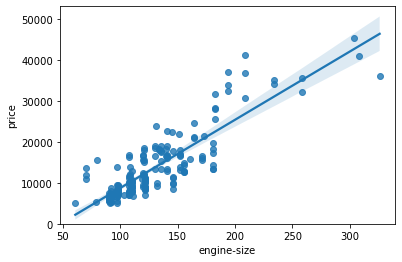

In [48]:
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

In [49]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


As the engine size goes up. the price goes up that indicate that two variable have strong positive relationship.engine size look good predictor for price in regression.

<h3>Checking relationship between highway-mpg and price</h3>

(0.0, 48168.69541840391)

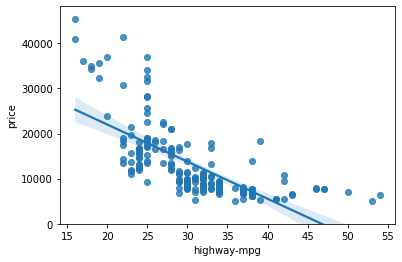

In [50]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

In [51]:
df[['price','highway-mpg']].corr()

,price,highway-mpg
price,1.000000,-0.704692
highway-mpg,-0.704692,1.000000


<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

<h3>Checking relationship between peak-rpm and price</h3>

(0.0, 47414.1)

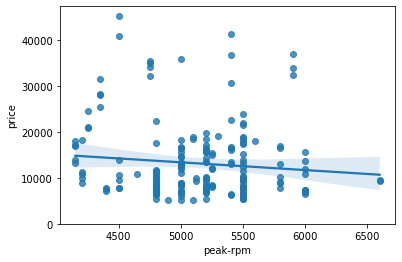

In [52]:
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [53]:
df[['price','peak-rpm']].corr()

,price,peak-rpm
price,1.000000,-0.101616
peak-rpm,-0.101616,1.000000


<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

<h3>Checking relationship between price and curb-weight</h3>

(0.0, 47758.14206905362)

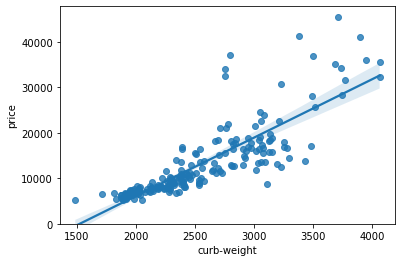

In [54]:
sns.regplot(x='curb-weight',y='price',data=df)
plt.ylim(0,)

In [55]:
df[['curb-weight','price']].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


strong positive relationship most of the point very close to line look very good predictor for regression 

<h3>Now categorical variable</h3>

<h3>Lets check relationship between price and body_style<h/3>

<AxesSubplot:xlabel='body-style', ylabel='price'>

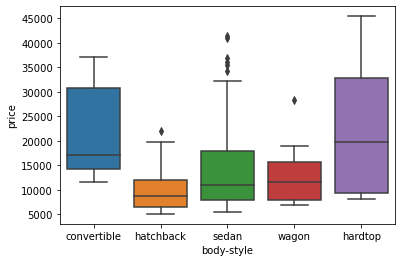

In [56]:
sns.boxplot(x='body-style',y='price',data = df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.</p>


<h3>Lets check relationship between price and engine-location<h/3>

<AxesSubplot:xlabel='engine-location', ylabel='price'>

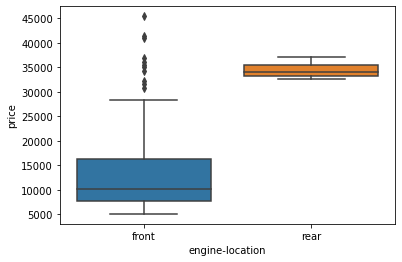

In [57]:
sns.boxplot(x='engine-location',y='price',data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


<h3>Lets check relationship between price and drive-wheels<h/3>

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

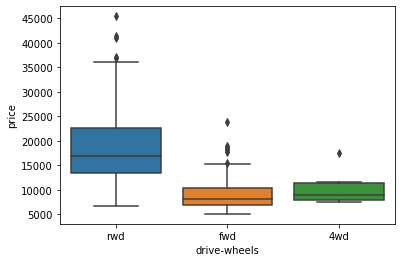

In [58]:
sns.boxplot(x='drive-wheels',y='price',data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>

<h1>Grouping</h1>

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

Lets make a group of 'price','drive-wheels','body-style'

In [59]:
df_group_1 = df[['body-style','drive-wheels','price']]

We can then calculate the average price for each of the different categories of data.

In [60]:
gdtest=df_group_1.groupby(['body-style','drive-wheels'],as_index=False).mean()
gdtest.head()

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000


We can also pivot this data just like in excel put body-style in column and drive-wheels in row and show the average price.

In [61]:
pivot_data = gdtest.pivot(index='drive-wheels',columns='body-style')
pivot_data.head()

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [62]:
pivot_data.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's use a heat map to visualize the relationship between drive-wheels vs Body Style vs Price.


<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>


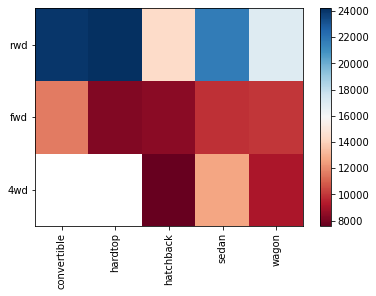

In [63]:
#heat map
fig, ax = plt.subplots()
im = ax.pcolor(pivot_data,cmap='RdBu')
row_labels = pivot_data.columns.levels[1]
col_labels = pivot_data.index
ax.set_xticks(np.arange(pivot_data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot_data.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h1>Correlation and P-value</h1>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


<h2>wheels-base vs price</h2>

In [64]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<AxesSubplot:xlabel='wheel-base', ylabel='price'>

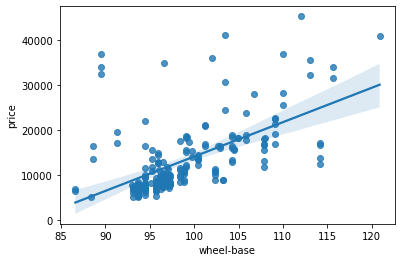

In [65]:
sns.regplot(x='wheel-base',y='price',data=df)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h2>horsepower vs price</h2>

In [66]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48


<AxesSubplot:xlabel='horsepower', ylabel='price'>

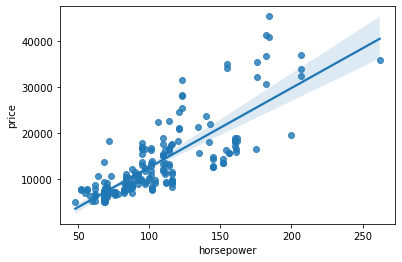

In [67]:
sns.regplot(x='horsepower',y='price',data=df)

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h2>Length vs price</h2>

In [68]:
pearson_coef, p_value = stats.pearsonr(df['length'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P = 8.016477466159328e-30


<AxesSubplot:xlabel='length', ylabel='price'>

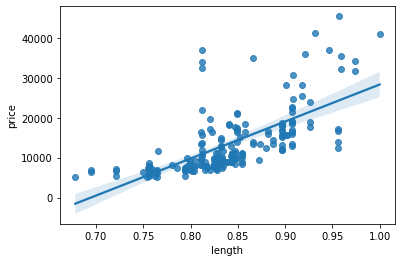

In [69]:
sns.regplot(x='length',y='price',data=df)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h2>Width vs price</h2>

In [70]:
pearson_coef, p_value = stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


<AxesSubplot:xlabel='width', ylabel='price'>

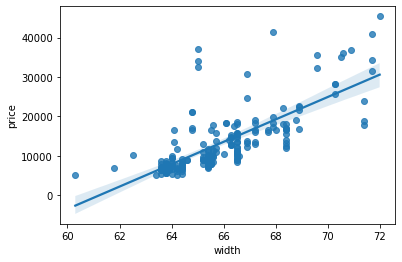

In [71]:
sns.regplot(x='width',y='price',data=df)

#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).

<h2>curb-weight vs price</h2>

In [72]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P = 2.189577238894065e-53


<AxesSubplot:xlabel='curb-weight', ylabel='price'>

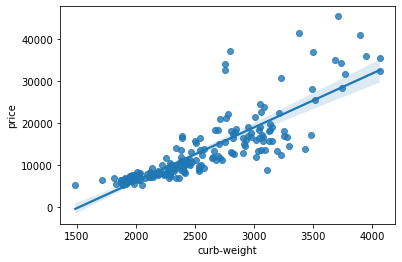

In [73]:
sns.regplot(x='curb-weight',y='price',data=df)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h2>engine-size vs price</h2>

In [74]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


<AxesSubplot:xlabel='engine-size', ylabel='price'>

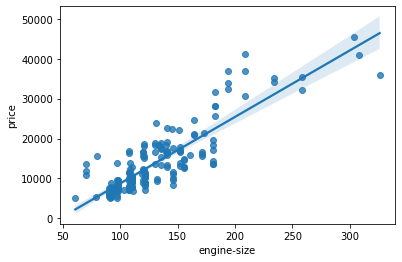

In [75]:
sns.regplot(x='engine-size',y='price',data=df)

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h2>bore vs price</h2>

In [76]:
pearson_coef, p_value = stats.pearsonr(df['bore'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17


<AxesSubplot:xlabel='bore', ylabel='price'>

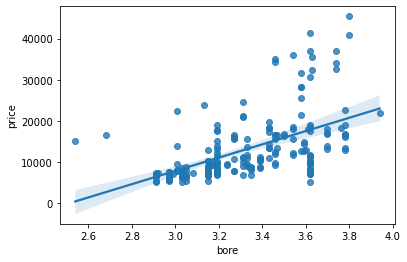

In [77]:
sns.regplot(x='bore',y='price',data=df)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


<h2>city-mpg vs price</h2>

In [78]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P = 2.321132065567641e-29


<AxesSubplot:xlabel='city-mpg', ylabel='price'>

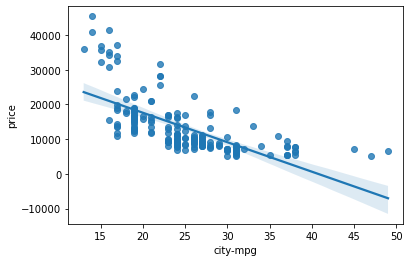

In [79]:
sns.regplot(x='city-mpg',y='price',data=df)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>

<h2>highway-mpg vs price</h2>

In [80]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'],df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P = 1.7495471144476358e-31


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

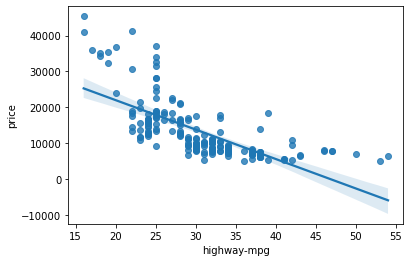

In [81]:
sns.regplot(x='highway-mpg',y='price',data=df)

#### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price.</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>



Now the next step is developing the model using regression 

<h1>Model Development</h1>

<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

<h2>Linear regression model</h2>


<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

<h4>How could "engine-size" help us predict car price?</h4>

For this example, we want to look at how engine-size can help us predict car price.
Using simple linear regression, we will create a linear function with "engine_size" as the predictor variable and the "price" as the response variable.


<h4>Let's load the modules for linear regression:</h4>

In [82]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>

In [83]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [84]:
X = df[['engine-size']]
Y = df['price']

In [85]:
lm1.fit(X,Y)

LinearRegression()

In [86]:
yhat = lm1.predict(X)
yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [87]:
#slope
lm1.coef_

array([166.86001569])

In [88]:
#intercept
lm1.intercept_

-7963.338906281049

In [89]:
#R^2 Value 
lm1.score(X,Y)

0.7609686443622008

<h3>What is the final estimated linear model we get?</h3>

Plugging in the actual values we get:


<b>Price</b> = -7963.34 + 166.86 x <b>engine-size</b>

 <h4>Now Lets check How could "highway-mpg" help us predict car price?</h4>

In [90]:
lm2=LinearRegression()
lm2

LinearRegression()

In [91]:
X = df[['highway-mpg']]
Y = df['price']

In [92]:
lm2.fit(X,Y)

LinearRegression()

In [93]:
yhat=lm2.predict(X)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [94]:
#slope
lm2.coef_

array([-821.73337832])

In [95]:
#intercept
lm2.intercept_

38423.305858157386

In [96]:
#R^2 value
lm2.score(X,Y)

0.4965911884339175

<h3>What is the final estimated linear model we get?</h3>

Plugging in the actual values we get:

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<h2>Multiple Linear Regression</h2>

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors.

we know that other good predictors of price could be:

<li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>

Let's develop a model using these variables as the predictor variables.

In [97]:
lm3 = LinearRegression()
lm3

LinearRegression()

In [98]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [99]:
lm3.fit(Z,df['price'])

LinearRegression()

In [100]:
yhat = lm3.predict(Z)
yhat[0:5]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344])

In [101]:
#slope
lm3.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

In [102]:
#intercept
lm3.intercept_

-15811.863767729243

In [103]:
#R^2 Value
lm3.score(Z, df['price'])

0.8093732522175299

What is the final estimated linear model that we get?

The final equation is

<b>Price</b> = -15811.863767729243 + 53.53022809 x <b>horsepower</b> + 4.70805253 x <b>curb-weight</b> + 81.51280006 x <b>engine-size</b> + 36.1593925 x <b>highway-mpg</b>


<h5>Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.</h5>

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>
<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Let's visualize **highway-mpg** as potential predictor variable of price:


(0.0, 48167.182787095444)

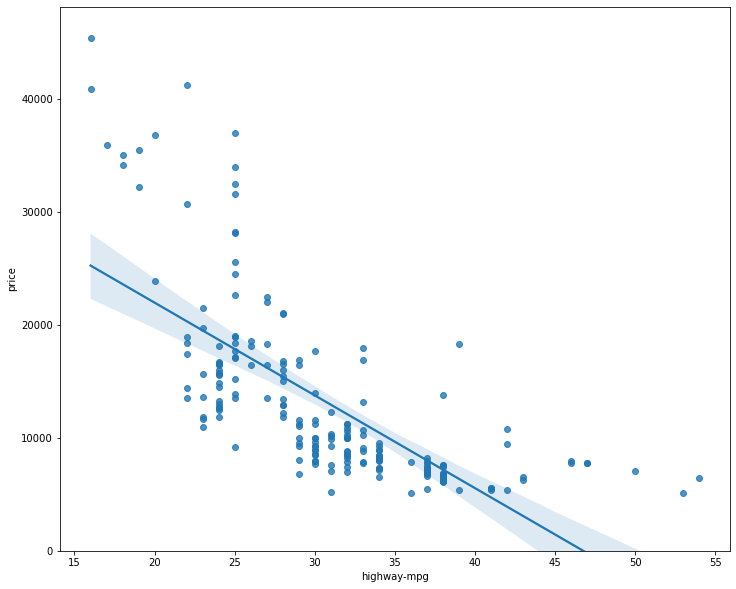

In [104]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "engine-size".</p>


Let's visualize **engine-size** as potential predictor variable of price:


(0.0, 53822.01096086058)

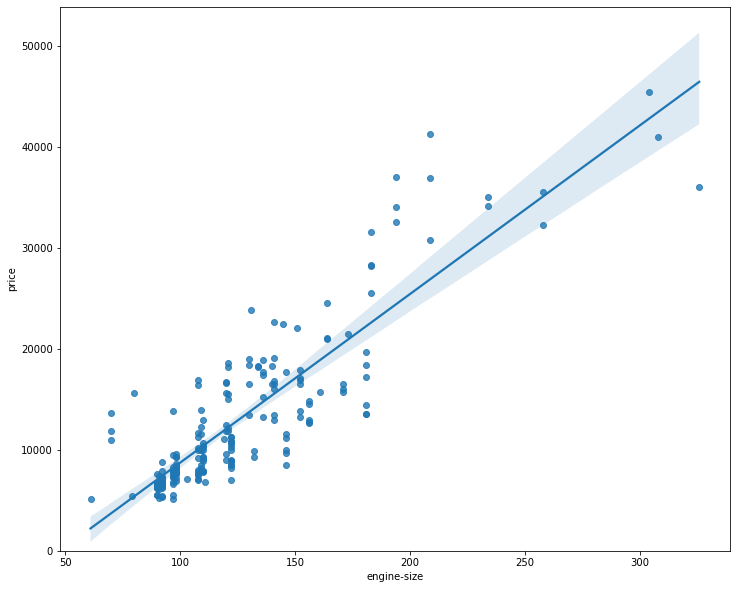

In [105]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

comparing the regression plot of "highway-mpg" "engine_size". We can see that the point of "engine_size" are closer to the predicted line.The points for "highway-mpg" have spread around the predicted line.


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


C:\Users\Fattani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


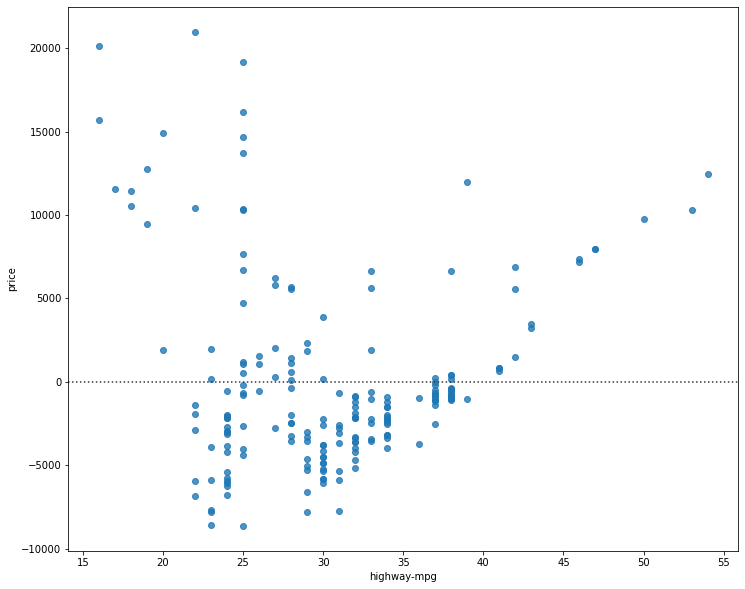

In [106]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Regression Model</h3>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [107]:
Yhat = lm3.predict(Z)

C:\Users\Fattani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Fattani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


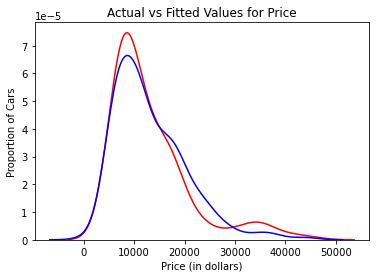

In [108]:
ax1 = sns.distplot(df['price'], hist = False, color="r",label="Actual Price")
sns.distplot(Yhat, hist=False, color= "b", label="Fitted value",ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

<h2> Polynomial Regression and Pipelines</h2>

a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


In [109]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [110]:
x = df['highway-mpg']
y = df['price']

In [111]:
# using the polynomial of the 3 order
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


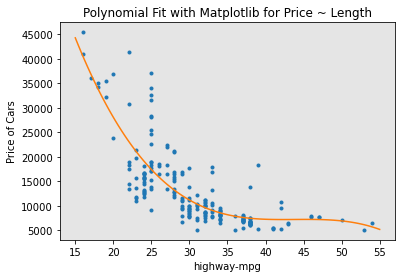

In [112]:
PlotPolly(p, x, y , "highway-mpg")

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [114]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree = 2)), ('model',LinearRegression())]

In [115]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [116]:
Z = df[[ 'highway-mpg']]
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [117]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([15376.8241149 , 15376.8241149 , 16746.44919888, 11812.17410051])

<h2>Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<h3>Model 1: Simple Linear Regression</h3>

<h3>Lets calculate R^2</h3>

In [118]:
#lets calculated R^2 for "highway-mpg"
X = df[['highway-mpg']]
Y = df['price']
lm1.fit(X,Y)
print(f'The r square is : {lm1.score(X,Y)}')

The r square is : 0.4965911884339175


We can say that \~49.659% of the variation of the price is explained by this simple linear model "highway-mpg".

Now Lets calculate MSE

In [119]:
Yhat = lm1.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>

<h3>Lets calculate R^2</h3> 

In [122]:
# lets calculated R^2 for MLR model
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
lm3.fit(Z,df['price'])
print("The R square is :",lm3.score(Z,df['price']))

The R square is : 0.8093732522175299


We can say that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Now lets calculate MSE

In [123]:
yhat = lm3.predict(Z)
print('The output of the first four predicted value is: ', yhat[0:4])

The output of the first four predicted value is:  [13699.07700462 13699.07700462 19052.71346719 10620.61524404]


In [124]:
mse = mean_squared_error(df['price'],yhat)
print('The mean square error of price and predicted value using multifit is: ',mse)

The mean square error of price and predicted value using multifit is:  11979300.34981888


<h3>Model 3: Polynomial Fit</h3>

<h3>Lets calculate R^2</h3>

In [125]:
from sklearn.metrics import r2_score

In [126]:
X = df[['highway-mpg']]
r_squared = r2_score(y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that \~67.419 % of the variation of price is explained by this polynomial fit.


Now lets calculate MSE

In [127]:
mse = mean_squared_error(df['price'],p(X))
print('The mean square error of price and predicted value using polynomial fit is: ',mse)

The mean square error of price and predicted value using polynomial fit is:  20474146.426361218


<h2> Prediction and Decision Making</h2>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models and compare them.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h2>Conclusion</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>

# Model Evaluation and Refinement

<h2 id="ref1">Training and Testing</h2>

In [128]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std_aspiration,turbo_aspiration
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


In [129]:
x_data = df[['horsepower','curb-weight','engine-size','highway-mpg']]


In [130]:
y_data = df['price']

<h3>Split data set into test and train data to check how our model is performing</h3>

In [131]:
#creating test and train data by spliting the selected dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=1)
print("The train data",x_train.shape[0])
print('The test data ',x_test.shape[0])


The train data 100
The test data  101


<h3>Create linear model</h3>

In [132]:
#Creating model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

<h3>Train our model with train data set</h3>

In [133]:
#train data prediction
yhat = lr.predict(x_train)
yhat[0:4]

array([21514.32054614,  6084.42931653,  5361.54431355,  6391.58218507])

<h3>Prediction on the test data</h3>

In [134]:
#test data prediction
yhat_pre = lr.predict(x_test)
yhat_pre[0:4]

array([11169.99395591,  5745.32833576, 11370.28826484,  6616.72557382])

<h3>Actual prices</h3>

In [135]:
y_test[0:4]

97      9549.0
117     6229.0
59     10245.0
35      7295.0
Name: price, dtype: float64

<h2>Regression plot between Actual price and predicted price</h2>

<AxesSubplot:xlabel='price'>

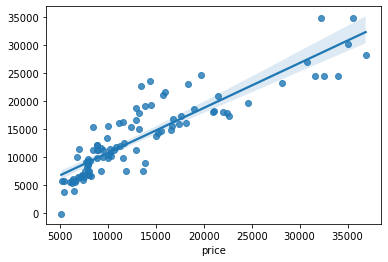

In [136]:
sns.regplot(x=y_test,y=yhat_pre,data=df)

<h2>Distribution plot between Actual value and Predicted values</h2>

C:\Users\Fattani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Fattani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


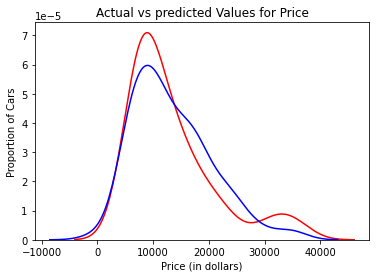

In [137]:
ax1 = sns.distplot(y_test, hist = False, color="r",label="Actual Price")
sns.distplot(yhat_pre, hist=False, color= "b", label="Predicted price",ax=ax1)
plt.title('Actual vs predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

<h3> Calculate the R^2 on the train data:</h3>

In [138]:
# R^2 for train data 
lr.score(x_train,y_train)

0.8242595067842322

<h3>Calculate the R^2 on the test data</h3>

In [139]:
# R^2 for test data
lr.score(x_test,y_test)

0.7898554028791229

<h2>Cross-Validation Score</h2>

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
Rcross = cross_val_score(lr, x_data, y_data, cv=4)

In [142]:
Rcross

array([0.84467645, 0.785845  , 0.56411173, 0.4635815 ])

In [143]:
from sklearn.model_selection import cross_val_predict

In [144]:
yhat1 = cross_val_predict(lr,x_data, y_data,cv=4)
yhat[0:5]

array([21514.32054614,  6084.42931653,  5361.54431355,  6391.58218507,
        7188.41484795])

In [147]:
features = df[['horsepower','curb-weight','engine-size','length','width','fuel-type-gas','fuel-type-diesel']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.40, random_state=1)


<h2>Ridge Model </h2>

In [148]:
from sklearn.linear_model import Ridge

In [149]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
print('The R^2 is :',RidgeModel.score(x_train,y_train))b

The R^2 is : 0.8370689041110252


In [150]:
RidgeModel.score(x_test,y_test)

0.768306319183372

<h1>Created By Mirza Huzaifa Ali Baig</h1>